Create an easy draft for a own Plotting package to visualize followig distributions with UPROOT
- M0_Omega := Dark Matter Relic Density
- M1 & M2 := Input parameters
- Susy Massen (HT Condor)

In [16]:
import uproot
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Define the base directory and the range of subdirectories
base_dir = "/eos/user/d/dvoss/Run3ModelGen/6249447/"
subdir_range = range(0, 20)  # Adjust range to include subdirectories to 20

# List to store data from all files
all_data = []

for subdir in subdir_range:
    file_path = os.path.join(base_dir, str(subdir), f"ntuple.6249447.{subdir}.root")
    
    try:
        # Open the ROOT file
        file = uproot.open(file_path)
        
        # Assuming the data you want is in a specific tree
        tree_name = "tree_name_here"  # Replace with the actual tree name
        tree = file[tree_name]
        
        # Convert tree to pandas DataFrame or any other format you prefer
        df = tree.arrays(library="pd")
        
        # Append the DataFrame to the list
        all_data.append(df)
        
    except Exception as e:
        print(f"Failed to open or process {file_path}: {e}")

# Concatenate all DataFrames into a single DataFrame if using pandas
import pandas as pd
final_df = pd.concat(all_data, ignore_index=True)

# Save the final DataFrame to a file
# output_path = "combined_data.csv"
# final_df.to_csv(output_path, index=False)
# print(f"Data saved to {output_path}")

In [4]:
# Read DataFrame from csv
final_df = pd.read_csv("susy_6249447.csv")

# Extract specific columns
desired_columns = ['IN_M_1', 'IN_M_2', 'MO_Omega']
extracted_df = final_df[desired_columns]


# Print the head of the extracted DataFrames
print(extracted_df)


             IN_M_1       IN_M_2     MO_Omega
0       -643.820221   215.255860      0.00138
1        237.394702  1256.947009   1130.00000
2       1500.538518  1472.140543      0.44200
3       1322.355298   708.959249      0.01410
4      -1730.921029   643.828870      0.01160
...             ...          ...          ...
199995   474.656415   901.700329    382.00000
199996 -1290.697994  1365.682086      5.93000
199997   -25.661212   803.640215  25400.00000
199998  1719.726784  1107.590831      0.03600
199999  -641.650041  1039.837627    244.00000

[200000 rows x 3 columns]


In [5]:
M_1 = final_df['IN_M_1']
M_2 = final_df['IN_M_2']
Omega = final_df['MO_Omega']

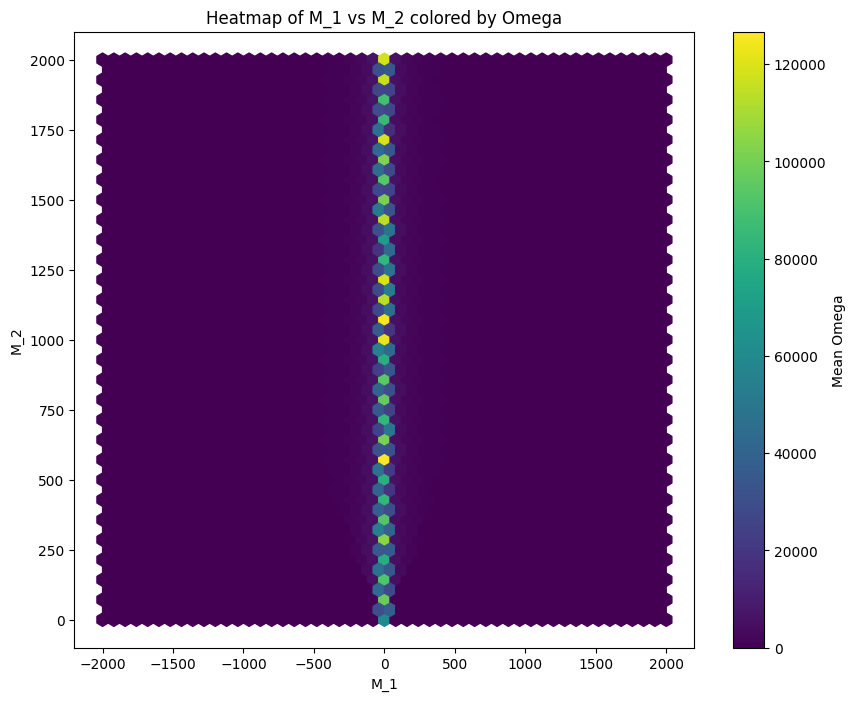

In [17]:
plt.figure(figsize=(10, 8))
hb = plt.hexbin(M_1, M_2, C=Omega, gridsize=50, cmap='viridis', reduce_C_function=np.mean)
plt.colorbar(hb, label='Mean Omega')
plt.xlabel('M_1')
plt.ylabel('M_2')
plt.title('Heatmap of M_1 vs M_2 colored by Omega')
plt.show()

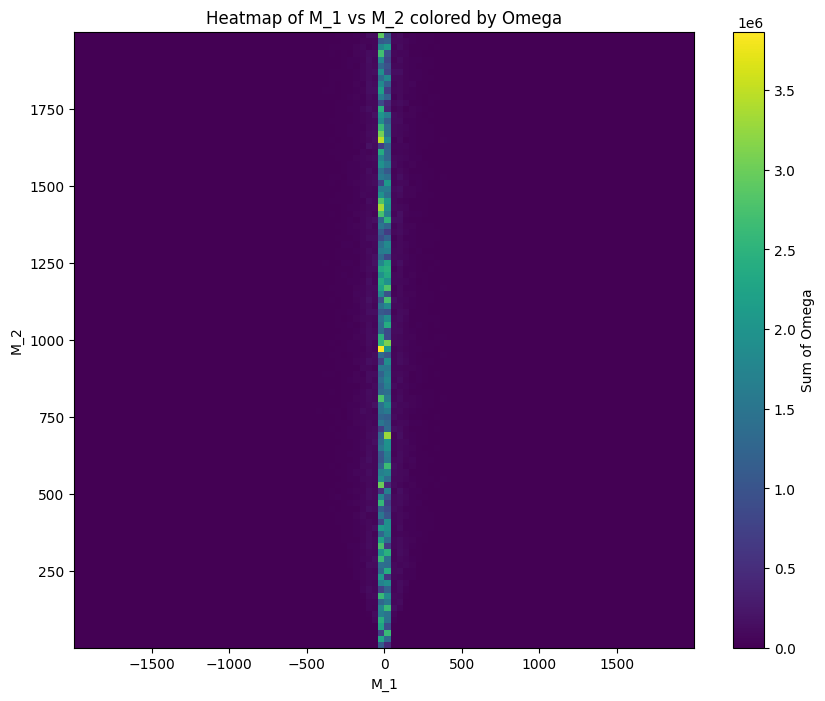

In [20]:
plt.figure(figsize=(10, 8))
heatmap, xedges, yedges = np.histogram2d(M_1, M_2, bins=100, weights=Omega)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Sum of Omega')
plt.xlabel('M_1')
plt.ylabel('M_2')
plt.title('Heatmap of M_1 vs M_2 colored by Omega')
plt.show()

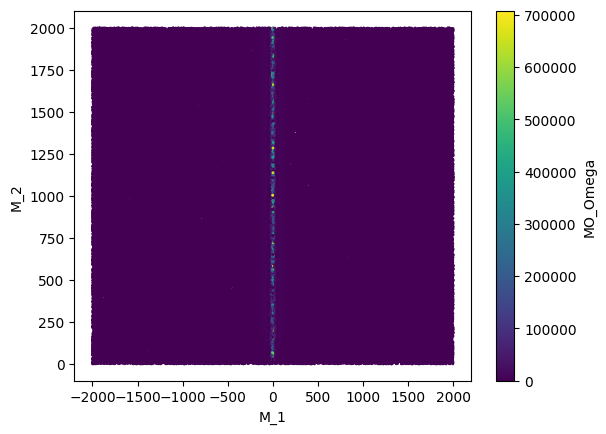

In [5]:
plt.scatter(M_1, M_2, c=Omega, s=1, marker='o', cmap='viridis')
plt.xlabel('M_1')
plt.ylabel('M_2')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('MO_Omega')


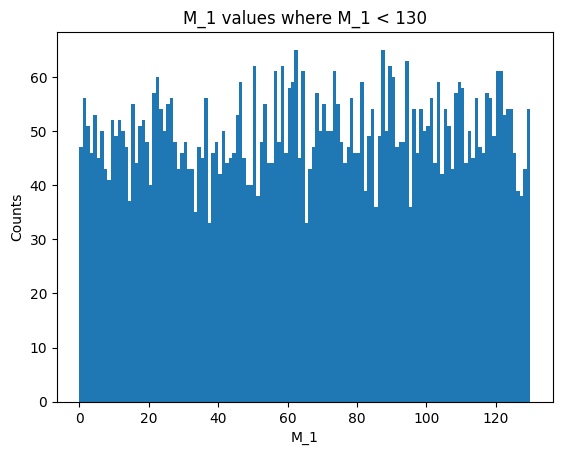

In [14]:
M_1_filtered = [m_1 for m_1 in M_1 if 0 < m_1 < 130.0]

plt.hist(M_1_filtered, bins=130)
plt.xlabel('M_1')
plt.ylabel('Counts')
plt.title('M_1 values where M_1 < 130')
plt.show()

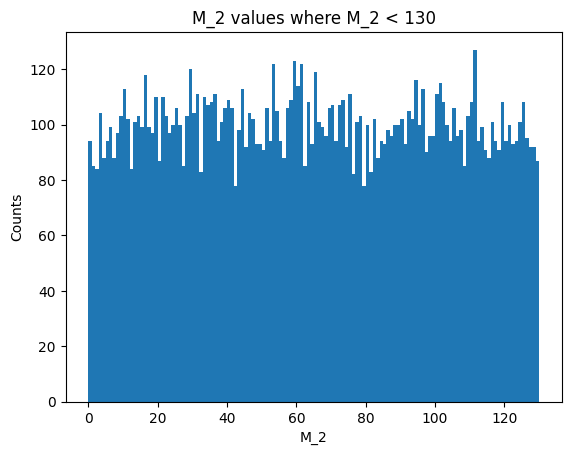

In [13]:
M_2_filtered = [m_2 for m_2 in M_2 if 0 < m_2 < 130.0]

plt.hist(M_2_filtered, bins=130)
plt.xlabel('M_2')
plt.ylabel('Counts')
plt.title('M_2 values where M_2 < 130')
plt.show()

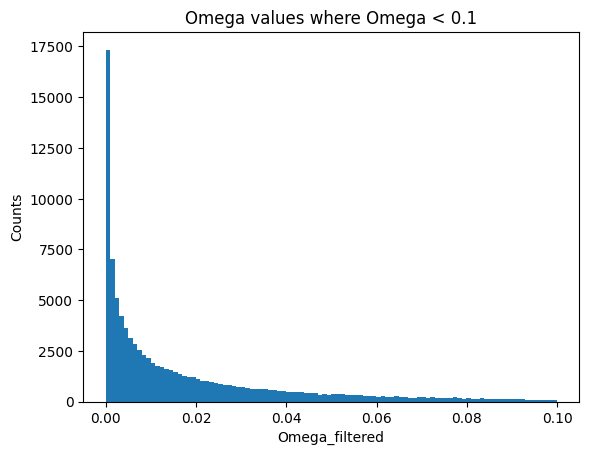

In [6]:
# Assuming Omega is a list or array of values
Omega_filtered = [omega for omega in Omega if 0 < omega < 0.1]

# Plot the filtered Omega values
plt.hist(Omega_filtered, bins=100)
plt.xlabel('Omega_filtered')
plt.ylabel('Counts')
plt.title('Omega values where Omega < 0.1')
plt.show()


Clean Dataset for realistic DMRD

In [22]:
cleaned_df = final_df[final_df['Omega'] == final_df['Omega_filtered']]

cleaned_df.to_csv()

KeyError: 'Omega'